# ${}^{4}{\rm He}$

The interaction is defined in `helium4plusplus.py`. It is nonlocal, and so is the counterterm. 

We will use it to perturbatviely calculate NLO phase shifts.

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import scienceplots

import mu2

import helium4plusplus as he4

plt.style.use('science')

In [3]:
ELL = 0

rg_flow = np.loadtxt('datfiles/he4plusplus_LO_nonlocal2_2_6_6_rg_flow.txt')

In [4]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
# X = he4.FACTOR * he4.BETA6 # K•Å^3

In [5]:
R, glo = rg_flow[0]
s = he4.NonlocalHelium4System2(R, ELL, 2, 6, 6, nq=200)

In [6]:
s.a0_and_r0_pert1_fast(glo, gnlo, momenta)

(99.99999998149116, 7.3331514356964815)

In [5]:
glo

2.3114653427023897

In [6]:
gnlo = 1
v0 = s.v_tilde + s.interaction.counterterm.gen(glo, 0)
v1 = s.interaction.counterterm.gen(0, gnlo)

In [7]:
np.savetxt('datfiles/v0.txt', v0.flatten())
np.savetxt('datfiles/v1.txt', v1.flatten())
np.savetxt('datfiles/q.txt', s.q)
np.savetxt('datfiles/wq.txt', s.wq)

In [8]:
s.q.size, s.qmax, 2*s.mu, he4.BETA6

(200, 7.218587863749154, 0.08251315259652389, 5.54125)

In [9]:
s.r_c

2.770625

In [10]:
kcd_lo = s.kcotd_gen_fast(momenta, glo, 0)
kcd_nlo = s.kcotd_gen_fast(momenta, glo, gnlo)

In [11]:
kcd_nlo1 = s.kcotd_gen_pert1(momenta, glo, gnlo)

In [12]:
# kcd_nlo1a = s.kcotd_gen_pert1_fast(momenta, glo, gnlo)
# kcd_nlo1, kcd_nlo1a, kcd_lo

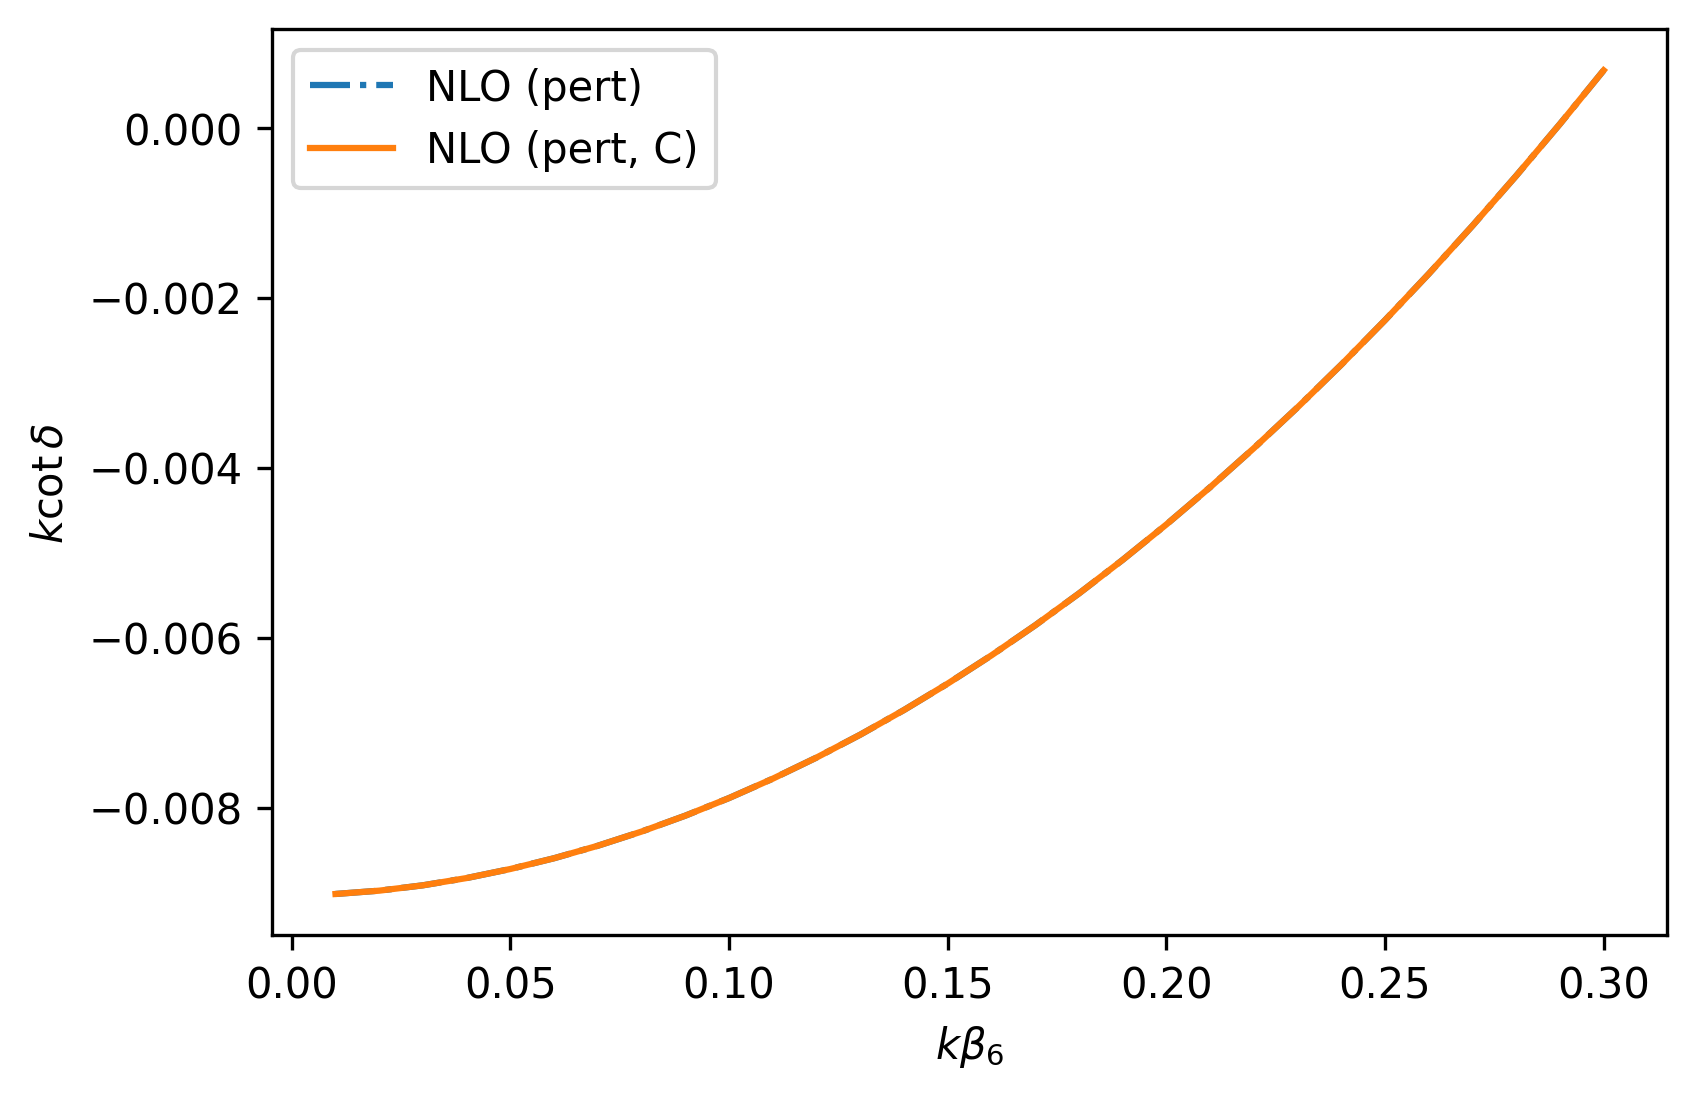

In [17]:
kcd_nlo1a = s.kcotd_gen_pert1_fast(momenta, glo, gnlo)

fig, ax = plt.subplots(dpi=300)
fig.patch.set_facecolor('white')

# ax.plot(momenta*he4.BETA6, kcd_lo, label='LO')
# ax.plot(momenta*he4.BETA6, kcd_nlo, label='NLO', linestyle='--')
ax.plot(momenta*he4.BETA6, kcd_nlo1, linestyle='-.', label='NLO (pert)')
ax.plot(momenta*he4.BETA6, kcd_nlo1a, linestyle='-', label='NLO (pert, C)')
# ax.plot(momenta*he4.BETA6, log1, label='test.c')
# ax.plot(momenta*he4.BETA6, log2[:, 2], label='test.c (2)')
# ax.plot(momenta*he4.BETA6, log2[:, 0], label='test.c (2)')

ax.legend()
ax.set_xlabel(r'$k\beta_6$')
ax.set_ylabel(r'$k\cot\delta$');